In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from tigro.classes.parser import Parser

from tigro.io.load import load_phmap
from tigro.core.process import filter_phmap
from tigro.utils.util import get_threshold
from tigro.core.process import med_phmap
from tigro.core.fit import fit_ellipse
from tigro.core.process import register_phmap
from tigro.utils.util import get_uref
from tigro.plots.plot import plot_sag
from tigro.core.fit import fit_zernike
from tigro.io.save import to_pickle
from tigro.plots.plot import plot_allpolys
from tigro.plots.plot import plot_polys
from tigro.io.load import from_pickle
from tigro.utils.util import get_diff_idx
from tigro.core.process import zerog_phmap
from tigro.plots.plot import plot_zerog
from tigro.core.process import delta_phmap
from tigro.plots.plot import plot_map

from tigro import logger

In [7]:
config = "../input/config.ini"
outpath = "."
pp = Parser(config, outpath)
logger.setLevel(pp.loglevel)

2024-07-24 13:10:56,102 - tigro - INFO - Initializing parser
2024-07-24 13:10:56,103 - tigro - DEBUG - Config file read
2024-07-24 13:10:56,103 - tigro - DEBUG - General parameters read
2024-07-24 13:10:56,104 - tigro - DEBUG - CGVT parameters read
2024-07-24 13:10:56,105 - tigro - DEBUG - CGVT plots options read
2024-07-24 13:10:56,105 - tigro - DEBUG - Zerog plots options read


In [8]:
pp.__dict__

{'file_name': '../input/config.ini',
 'outpath': '.',
 'config': <configparser.ConfigParser at 0x7f63bacd35e0>,
 'datapath': '/export/NAS/ariel/data/ariel_user/TA/M1-SM/formatted_data',
 'sequence_ids': [237,
  238,
  239,
  240,
  241,
  242,
  243,
  244,
  245,
  246,
  247,
  248,
  249,
  250,
  251,
  252,
  253,
  254,
  255,
  256,
  257,
  258,
  259,
  260,
  261,
  262,
  263,
  264,
  265,
  266,
  267,
  268,
  269,
  270,
  271,
  272],
 'n_zernike': 15,
 'store_phmap': False,
 'fname_phmap': './tigro.pkl',
 'loglevel': 'DEBUG',
 'run_cgvt': True,
 'phmap_filter_type': <numpy.ma.core._frommethod at 0x7f6511101870>,
 'phmap_semi_major': 451,
 'phmap_semi_minor': 310,
 'phmap_seq_ref': 237,
 'plot_regmap': True,
 'plot_regmap_imkey': 237,
 'plot_regmap_no_pttf': True,
 'plot_regmap_no_pttf_imkey': 237,
 'plot_allpolys': True,
 'plot_allpolys_seq_ref': 237,
 'plot_allpolys_colors': 'rrrrrrrrrrrrmmmmmmmmmmmm',
 'plot_polys': True,
 'plot_polys_seq_ref': 237,
 'plot_polys_orde

### CGVT

In [8]:
logger.info("Running CGVT")

In [5]:
logger.info("Loading phase maps")
phmap = load_phmap(pp.datapath, pp.sequence_ids)

2024-07-18 11:53:15,292 - tigro - INFO - Loading phase maps
2024-07-18 11:53:15,306 - tigro - DEBUG - Loading files ...
2024-07-18 11:53:15,329 - tigro - DEBUG - 237 010 20240709 237_10_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,343 - tigro - DEBUG - 237 011 20240709 237_11_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,356 - tigro - DEBUG - 237 012 20240709 237_12_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,369 - tigro - DEBUG - 237 013 20240709 237_13_20240709_M1-g ['M1-g']


2024-07-18 11:53:15,382 - tigro - DEBUG - 237 014 20240709 237_14_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,393 - tigro - DEBUG - 237 015 20240709 237_15_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,407 - tigro - DEBUG - 237 016 20240709 237_16_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,419 - tigro - DEBUG - 237 017 20240709 237_17_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,432 - tigro - DEBUG - 237 018 20240709 237_18_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,445 - tigro - DEBUG - 237 019 20240709 237_19_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,457 - tigro - DEBUG - 237 001 20240709 237_1_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,471 - tigro - DEBUG - 237 020 20240709 237_20_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,482 - tigro - DEBUG - 237 021 20240709 237_21_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,496 - tigro - DEBUG - 237 022 20240709 237_22_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,508 - tigro - DEBUG - 237 023 20240709 237_23_20240709_M1-g ['M1-g']
2024-07-18 11:53:15,51

In [6]:
logger.info("Filtering phase maps")
phmap = filter_phmap(phmap)

2024-07-18 11:53:25,502 - tigro - INFO - Filtering phase maps
2024-07-18 11:53:25,504 - tigro - DEBUG - Filter sequence...
2024-07-18 11:53:25,505 - tigro - DEBUG - 237


2024-07-18 11:53:30,458 - tigro - DEBUG - 238
2024-07-18 11:53:35,603 - tigro - DEBUG - 239
2024-07-18 11:53:40,574 - tigro - DEBUG - 240
2024-07-18 11:53:45,382 - tigro - DEBUG - 241
2024-07-18 11:53:50,328 - tigro - DEBUG - 242
2024-07-18 11:53:55,345 - tigro - DEBUG - 243
2024-07-18 11:53:59,988 - tigro - DEBUG - Sequence 243 rotated
2024-07-18 11:53:59,990 - tigro - DEBUG - 244
2024-07-18 11:54:04,761 - tigro - DEBUG - Sequence 244 rotated
2024-07-18 11:54:04,765 - tigro - DEBUG - 245
2024-07-18 11:54:09,814 - tigro - DEBUG - Sequence 245 rotated
2024-07-18 11:54:09,816 - tigro - DEBUG - 246
2024-07-18 11:54:14,619 - tigro - DEBUG - Sequence 246 rotated
2024-07-18 11:54:14,621 - tigro - DEBUG - 247
2024-07-18 11:54:19,348 - tigro - DEBUG - Sequence 247 rotated
2024-07-18 11:54:19,350 - tigro - DEBUG - 248
2024-07-18 11:54:24,439 - tigro - DEBUG - Sequence 248 rotated
2024-07-18 11:54:24,440 - tigro - DEBUG - 261
2024-07-18 11:54:29,510 - tigro - DEBUG - 262
2024-07-18 11:54:34,419 

2024-07-18 11:55:23,747 - tigro - INFO - Getting threshold for outlier rejection


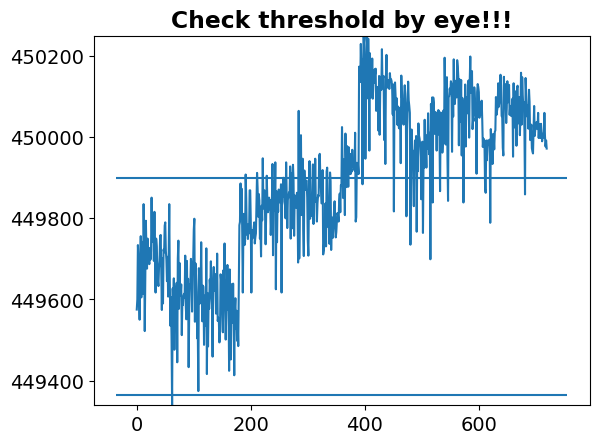

In [7]:
logger.info("Getting threshold for outlier rejection")
threshold = get_threshold(phmap)

In [8]:
logger.info("Computing median map and supermask")
phmap = med_phmap(
    phmap,
    threshold,
    filter_type=pp.phmap_filter_type,
)

2024-07-18 11:55:24,553 - tigro - INFO - Computing median map and supermask


In [9]:
logger.info("Fitting ellipse to phase maps")
phmap = fit_ellipse(phmap)

2024-07-18 11:55:33,814 - tigro - INFO - Fitting ellipse to phase maps
2024-07-18 11:55:33,831 - tigro - DEBUG - 237 (498.3 481.2) 456.8 313.3 -0.8
2024-07-18 11:55:33,847 - tigro - DEBUG - 238 (498.3 481.2) 456.8 313.2 -0.8
2024-07-18 11:55:33,863 - tigro - DEBUG - 239 (498.3 481.1) 456.7 313.2 -0.8


2024-07-18 11:55:33,879 - tigro - DEBUG - 240 (498.2 481.3) 456.7 313.2 -0.8
2024-07-18 11:55:33,894 - tigro - DEBUG - 241 (498.3 481.3) 456.7 313.3 -0.8
2024-07-18 11:55:33,910 - tigro - DEBUG - 242 (498.2 481.3) 456.7 313.3 -0.8
2024-07-18 11:55:33,926 - tigro - DEBUG - 243 (525.7 530.1) 456.8 313.3 -0.9
2024-07-18 11:55:33,942 - tigro - DEBUG - 244 (525.8 530.2) 456.8 313.5 -0.9
2024-07-18 11:55:33,959 - tigro - DEBUG - 245 (525.6 530.2) 456.6 313.5 -0.9
2024-07-18 11:55:33,975 - tigro - DEBUG - 246 (525.6 530.2) 456.6 313.5 -0.9
2024-07-18 11:55:33,990 - tigro - DEBUG - 247 (525.9 530.2) 456.7 313.5 -0.9
2024-07-18 11:55:34,006 - tigro - DEBUG - 248 (525.6 530.2) 456.6 313.6 -0.9
2024-07-18 11:55:34,021 - tigro - DEBUG - 261 (500.3 500.6) 456.9 313.3 -0.0
2024-07-18 11:55:34,036 - tigro - DEBUG - 262 (500.2 500.5) 456.9 313.5 -0.0
2024-07-18 11:55:34,052 - tigro - DEBUG - 263 (500.2 500.5) 457.0 313.5 -0.0
2024-07-18 11:55:34,067 - tigro - DEBUG - 264 (500.2 500.5) 457.0 313.4 -0.0

In [10]:
logger.info("Registering phase maps")
phmap = register_phmap(phmap)

2024-07-18 11:55:34,224 - tigro - INFO - Registering phase maps


2024-07-18 11:55:34,523 - tigro - DEBUG - || seq:237 | dx: 13.69 dy: 30.79  ||
2024-07-18 11:55:34,808 - tigro - DEBUG - || seq:238 | dx: 13.70 dy: 30.84  ||
2024-07-18 11:55:35,094 - tigro - DEBUG - || seq:239 | dx: 13.71 dy: 30.86  ||
2024-07-18 11:55:35,380 - tigro - DEBUG - || seq:240 | dx: 13.80 dy: 30.74  ||
2024-07-18 11:55:35,663 - tigro - DEBUG - || seq:241 | dx: 13.66 dy: 30.69  ||
2024-07-18 11:55:35,946 - tigro - DEBUG - || seq:242 | dx: 13.81 dy: 30.71  ||
2024-07-18 11:55:36,236 - tigro - DEBUG - || seq:243 | dx:-13.74 dy:-18.09  ||
2024-07-18 11:55:36,522 - tigro - DEBUG - || seq:244 | dx:-13.82 dy:-18.18  ||
2024-07-18 11:55:36,809 - tigro - DEBUG - || seq:245 | dx:-13.64 dy:-18.20  ||
2024-07-18 11:55:37,092 - tigro - DEBUG - || seq:246 | dx:-13.63 dy:-18.23  ||
2024-07-18 11:55:37,371 - tigro - DEBUG - || seq:247 | dx:-13.87 dy:-18.16  ||
2024-07-18 11:55:37,653 - tigro - DEBUG - || seq:248 | dx:-13.60 dy:-18.24  ||
2024-07-18 11:55:37,920 - tigro - DEBUG - || seq:261

In [11]:
logger.info("Getting reference map")
uref = get_uref(
    phmap,
    pp.phmap_semi_major,
    pp.phmap_semi_minor,
    pp.phmap_seq_ref,
)

2024-07-18 11:55:40,856 - tigro - INFO - Getting reference map


2024-07-18 11:55:40,893 - tigro - INFO - Plotting sag of registered phase map


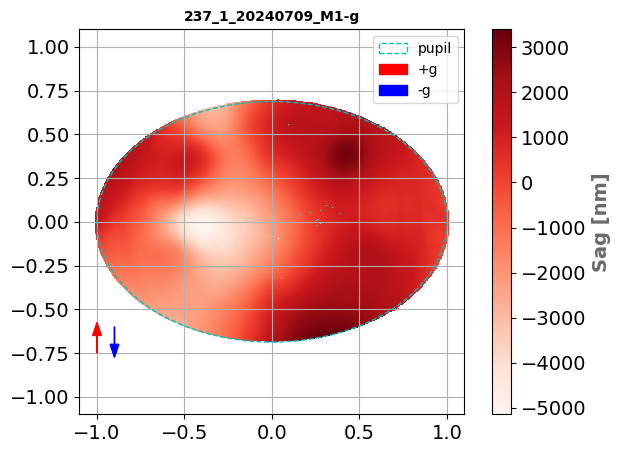

In [12]:
if pp.plot_regmap:
    logger.info("Plotting sag of registered phase map")
    plot_sag(
        phmap,
        uref,
        imkey=pp.plot_regmap_imkey,
        imsubkey="RegMap",
    )

In [13]:
logger.info("Fitting Zernike orthonormal polynomials")
phmap = fit_zernike(
    phmap,
    uref,
    NZernike=pp.n_zernike,
)

2024-07-18 11:55:41,188 - tigro - INFO - Fitting Zernike orthonormal polynomials
2024-07-18 11:55:41,189 - tigro - DEBUG - Calculating 15 Polys... 


2024-07-18 11:55:42,893 - tigro - DEBUG - ... done!
2024-07-18 11:55:42,894 - tigro - DEBUG - Fitting sequence n: ...
2024-07-18 11:55:42,895 - tigro - DEBUG - 237
2024-07-18 11:55:43,177 - tigro - DEBUG - 238
2024-07-18 11:55:43,463 - tigro - DEBUG - 239
2024-07-18 11:55:43,746 - tigro - DEBUG - 240
2024-07-18 11:55:44,029 - tigro - DEBUG - 241
2024-07-18 11:55:44,316 - tigro - DEBUG - 242
2024-07-18 11:55:44,608 - tigro - DEBUG - 243
2024-07-18 11:55:44,897 - tigro - DEBUG - 244
2024-07-18 11:55:45,189 - tigro - DEBUG - 245
2024-07-18 11:55:45,481 - tigro - DEBUG - 246
2024-07-18 11:55:45,772 - tigro - DEBUG - 247
2024-07-18 11:55:46,066 - tigro - DEBUG - 248
2024-07-18 11:55:46,358 - tigro - DEBUG - 261
2024-07-18 11:55:46,651 - tigro - DEBUG - 262
2024-07-18 11:55:46,941 - tigro - DEBUG - 263
2024-07-18 11:55:47,225 - tigro - DEBUG - 264
2024-07-18 11:55:47,509 - tigro - DEBUG - 265
2024-07-18 11:55:47,793 - tigro - DEBUG - 266
2024-07-18 11:55:48,080 - tigro - DEBUG - 267
2024-07-

2024-07-18 11:55:49,838 - tigro - INFO - Plotting sag of registered phase map, minus the Piston, Tip, Tilts and Defocus


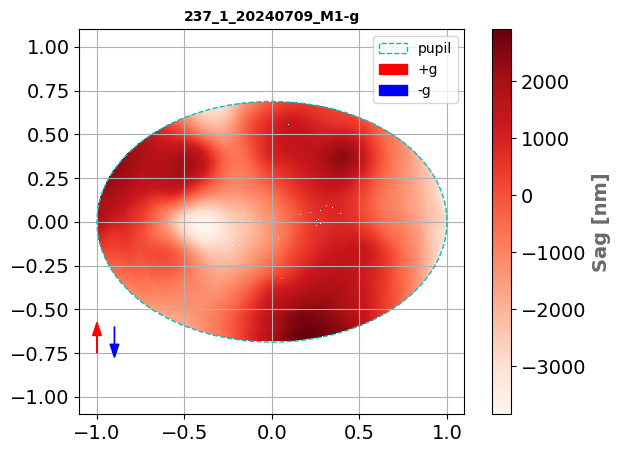

In [14]:
if pp.plot_regmap_no_pttf:
    logger.info(
        "Plotting sag of registered phase map, minus the Piston, Tip, Tilts and Defocus"
    )
    plot_sag(
        phmap,
        uref,
        imkey=pp.plot_regmap_no_pttf_imkey,
        imsubkey="RegMap-PTTF",
    )

In [15]:
if pp.store_phmap:
    logger.info("Saving results to pickle file")
    to_pickle(phmap, pp.outpath)

2024-07-18 11:55:50,149 - tigro - INFO - Plotting all polynomials


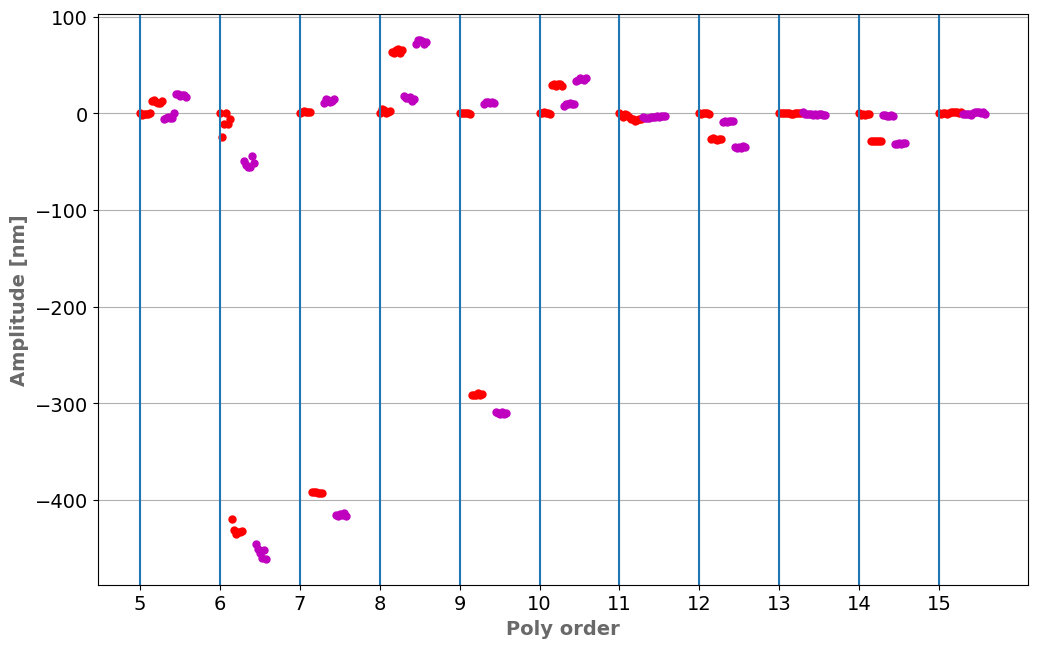

In [16]:
if pp.plot_allpolys:
    logger.info("Plotting all polynomials")
    plot_allpolys(
        phmap,
        sequence_ids=pp.sequence_ids,
        sequence_ref=pp.plot_allpolys_seq_ref,
        NZernike=pp.n_zernike,
        colors=pp.plot_allpolys_colors,
    )

2024-07-18 11:55:50,319 - tigro - INFO - Plotting subset of polynomials vs. sequence


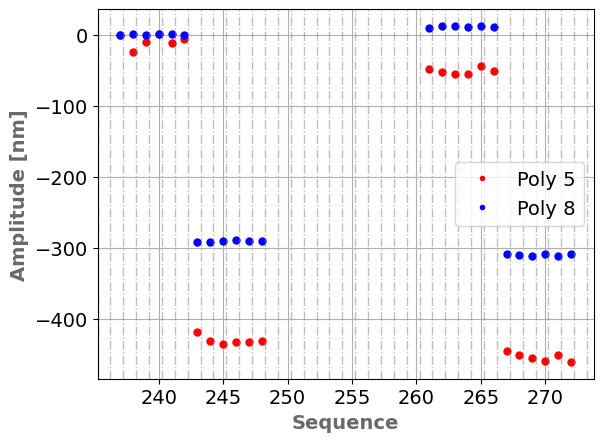

In [17]:
if pp.plot_polys:
    logger.info("Plotting subset of polynomials vs. sequence")
    plot_polys(
        phmap,
        sequence_ids=pp.sequence_ids,
        sequence_ref=pp.plot_polys_seq_ref,
        poly_order=pp.plot_polys_order,
        colors=pp.plot_polys_colors,
    )

### ZEROG

In [18]:
logger.info("Running ZeroG")

2024-07-18 11:55:50,544 - tigro - INFO - Running ZeroG


In [19]:
if not phmap:
    try:
        logger.info("Loading phase maps")
        phmap = from_pickle(pp.outpath)
    except FileNotFoundError:
        logger.error("File not found")

In [20]:
logger.info("Getting diff indices")
diff_idx = get_diff_idx(
    pp.zerog_start_indices_pairs, pp.zerog_num_pairs, pp.zerog_colors
)

2024-07-18 11:55:50,614 - tigro - INFO - Getting diff indices


In [21]:
logger.info("ZeroG-ing phase maps")
medmap, zerogmap, coeff_med, cmed, rms, color = zerog_phmap(phmap, diff_idx)

2024-07-18 11:55:50,641 - tigro - INFO - ZeroG-ing phase maps


2024-07-18 11:55:51,625 - tigro - INFO - Plotting ZeroG results


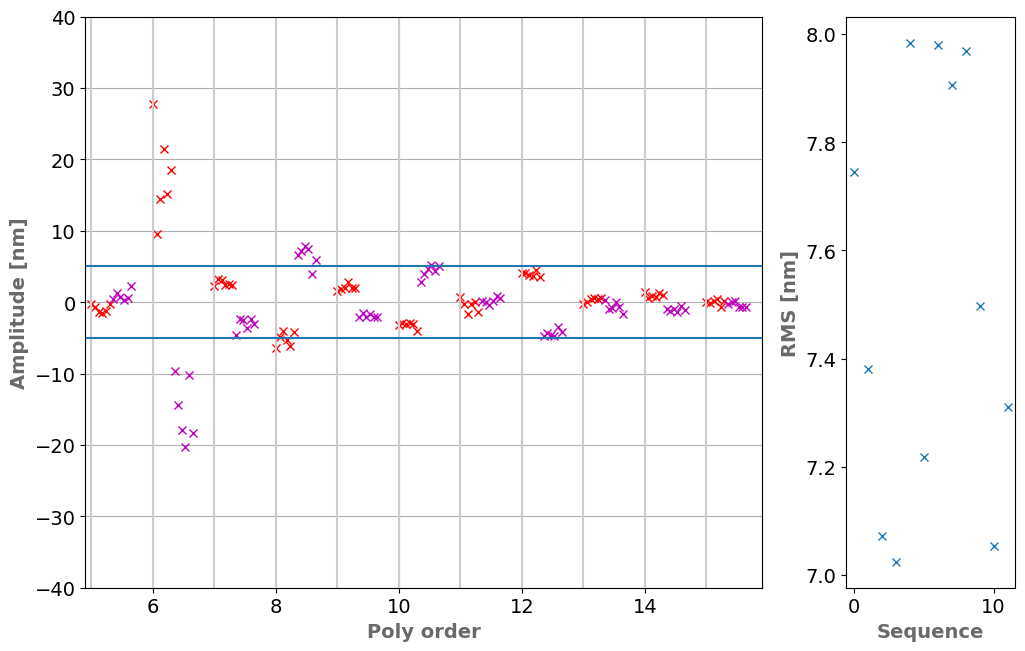

In [22]:
if pp.plot_zerog:
    logger.info("Plotting ZeroG results")
    plot_zerog(
        coeff_med,
        cmed,
        rms,
        color,
        pp.plot_zerog_ylim,
    )

In [23]:
logger.info("Computing delta phase map")
dphmap = delta_phmap(
    zerogmap,
    idx0=pp.dphmap_idx0,
    idx1=pp.dphmap_idx1,
    gain=pp.dphmap_gain,
    filter_type=pp.dphmap_filter_type,
)

2024-07-18 11:55:51,834 - tigro - INFO - Computing delta phase map


2024-07-18 11:55:52,011 - tigro - INFO - Plotting delta phase map


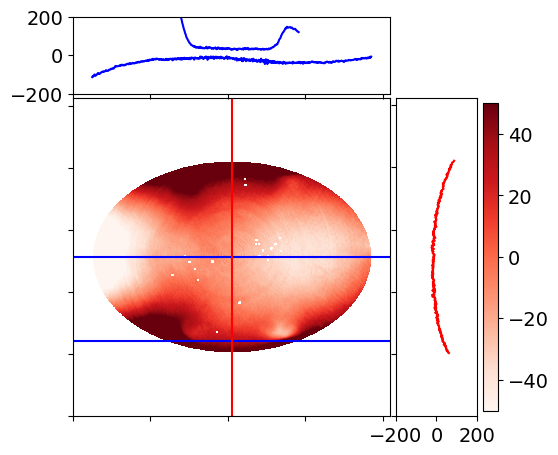

In [24]:
if pp.plot_dphmap:
    logger.info("Plotting delta phase map")

    plot_map(
        dphmap,
        hlines=pp.plot_dphmap_hlines,
        vlines=pp.plot_dphmap_vlines,
        hist_xlim=pp.plot_dphmap_hist_xlim,
        hist_ylim=pp.plot_dphmap_hist_ylim,
    )